In [155]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.io.json import json_normalize
from datetime import datetime
from datetime import date, timedelta


from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

In [156]:
dfLogins = pd.read_json('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/ultimate_challenge 2/logins.json')

In [157]:
#dfUE = pd.read_json('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/ultimate_challenge 2/ultimate_data_challenge.json')

In [158]:
jsonString=json.load((open('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/ultimate_challenge 2/ultimate_data_challenge.json')))


In [159]:
dfUE=json_normalize(jsonString)

In [160]:
dfUE.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [161]:
dfLogins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [162]:
dfLogins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [163]:
dfLogins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


# Part 1 - Exploratory Data Analysis

In [164]:
# reindex to a dateTime index
dfLogins = dfLogins.set_index(pd.DatetimeIndex(dfLogins['login_time']))

In [165]:
#downsample to 15min intervals
t15=dfLogins.resample('15min',how='count')

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  from ipykernel import kernelapp as app


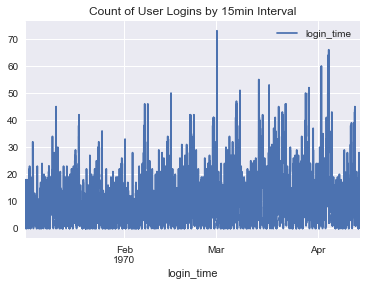

In [166]:
#meaningless plot that is too messy, 15min is too deep a downsample for meaning
t15.plot()
plt.title('Count of User Logins by 15min Interval')

In [167]:
#resample to daily logins
tD=dfLogins.resample('D',how='count')

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  from ipykernel import kernelapp as app


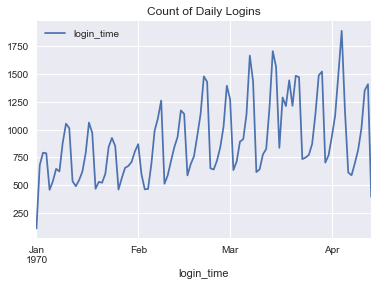

In [168]:
tD.plot()
plt.title('Count of Daily Logins')

In [169]:
# resample to half day login intervals
tM=dfLogins.resample('12H',how='count')

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  from ipykernel import kernelapp as app


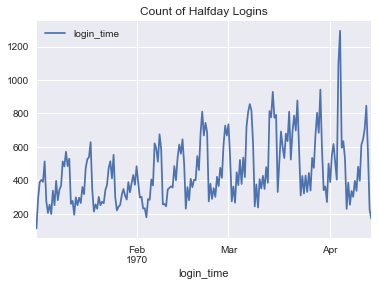

In [170]:
tM.plot()
plt.title('Count of Halfday Logins')

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=7,center=False).mean()
  from ipykernel import kernelapp as app


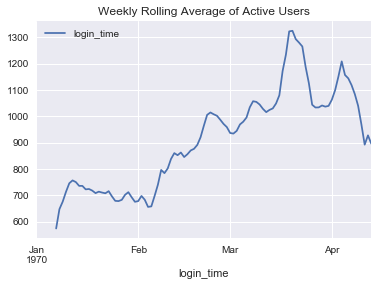

In [171]:
# try a weekly rolling average
pd.rolling_mean(tD,7).plot()
plt.title('Weekly Rolling Average of Active Users')

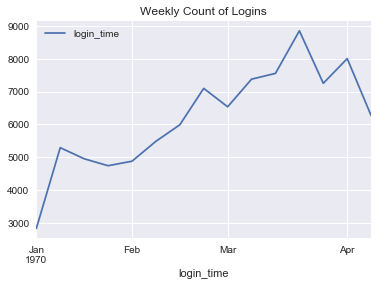

In [172]:
# weekly count
tWeekly = dfLogins.resample('W-MON').count()
tWeekly.plot()
plt.title('Weekly Count of Logins')

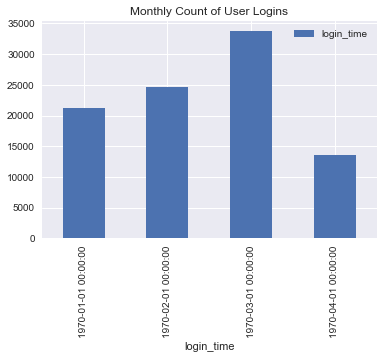

In [173]:
# Month end sum of users
tMonth = dfLogins.resample('MS').count()
tMonth.plot.bar()
plt.title('Monthly Count of User Logins')

In [174]:
# can we reveal something about nights and weekends?

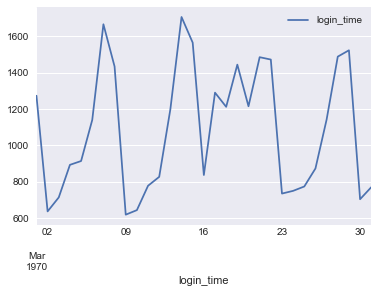

In [175]:
#clearly weekend traffic drives logins
dfLogins['1970-03'].resample('D').count().plot()

In [176]:
dfLogins.rename(columns={'login_time':'login_time_count'},inplace=True)
dfLogins.reset_index(inplace=True)

In [177]:
dfLogins.loc[:, 'weekday'] = dfLogins['login_time'].dt.weekday
dfLogins.loc[:, 'month'] = dfLogins['login_time'].dt.month
dfLogins.loc[:, 'year'] = dfLogins['login_time'].dt.year
dfLogins.loc[:, 'hour'] = dfLogins['login_time'].dt.hour

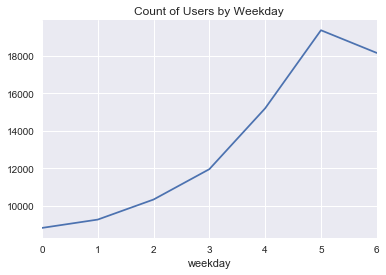

In [178]:
#rises towards weekend
dfLogins.groupby(['weekday'])['login_time'].count().plot()
plt.title('Count of Users by Weekday')

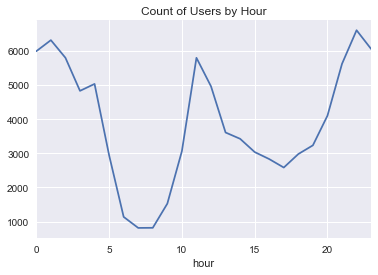

In [179]:
#rises at midday and night
dfLogins.groupby(['hour'])['login_time'].count().plot()
plt.title('Count of Users by Hour')

# Part 2 - Experiment and Metrics Design

In [180]:
# see google doc

# Part 3 - Predictive Modelling 

In [181]:
dfUE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [182]:
# convert the dates to datetime
dfUE['last_trip_dt'] = pd.to_datetime(dfUE['last_trip_date'])
dfUE['signup_dt']=pd.to_datetime(dfUE['signup_date'])

In [183]:
#time window for retained user test
mostRecent = dfUE['last_trip_dt'].max()
margin = timedelta(days = 30)

In [184]:
dfUE['retained'] = dfUE['last_trip_dt'].apply(lambda x: 1 if (mostRecent-x)<margin else 0)

In [185]:
dfUE.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip_dt,signup_dt,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-06-17,2014-01-25,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-05-05,2014-01-29,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-01-07,2014-01-06,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-06-29,2014-01-10,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-03-15,2014-01-27,0


In [186]:
#percentage of users qualifying as retained, taken a ride in last 30 days
dfUE.retained.mean()

0.3662

In [187]:
#generate the model dataframe by getting dummies for city and phone
dfModel = pd.get_dummies(dfUE,columns=['city','phone','ultimate_black_user'])

In [188]:
#generate features from the datetime stamp information
dfModel.loc[:, 'weekday'] = dfModel['last_trip_dt'].dt.weekday
dfModel.loc[:, 'month'] = dfModel['last_trip_dt'].dt.month
dfModel.loc[:, 'signup_weekday'] = dfModel['signup_dt'].dt.weekday
dfModel.loc[:, 'signup_month'] = dfModel['signup_dt'].dt.month

In [189]:
dfModel['weekend'] = dfModel['weekday'].apply(lambda x: 1 if x>4 else 0) #weekend is 1
dfModel['months_as_member'] = dfModel['month']-dfModel['signup_month']

In [190]:
dfModel.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,last_trip_dt,...,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True,weekday,month,signup_weekday,signup_month,weekend,months_as_member
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,46.2,2014-06-17,...,0,1,0,1,1,6,5,1,0,5
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,50.0,2014-05-05,...,1,0,1,0,0,5,2,1,0,4
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,100.0,2014-01-07,...,0,1,1,0,1,1,0,1,0,0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,80.0,2014-06-29,...,0,1,0,1,6,6,4,1,1,5
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,82.4,2014-03-15,...,1,0,1,0,5,3,0,1,1,2


In [191]:
dfModel.isnull().any()

avg_dist                     False
avg_rating_by_driver          True
avg_rating_of_driver          True
avg_surge                    False
last_trip_date               False
signup_date                  False
surge_pct                    False
trips_in_first_30_days       False
weekday_pct                  False
last_trip_dt                 False
signup_dt                    False
retained                     False
city_Astapor                 False
city_King's Landing          False
city_Winterfell              False
phone_Android                False
phone_iPhone                 False
ultimate_black_user_False    False
ultimate_black_user_True     False
weekday                      False
month                        False
signup_weekday               False
signup_month                 False
weekend                      False
months_as_member             False
dtype: bool

In [192]:
dfModel = dfModel.fillna(method='ffill')

In [193]:
dfModel  = dfModel.drop(['month','months_as_member','last_trip_date','signup_date','last_trip_dt','signup_dt'],axis=1)
#dropped Month from the model because it is too strongly related to the retained field as that's how retained was calc'd

In [194]:
dfModel.corr()
#some mild issues with multicollinearity here

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True,weekday,signup_weekday,signup_month,weekend
avg_dist,1.000000,0.079562,0.019774,-0.081491,-0.104414,-0.136329,0.101652,-0.090279,-0.045431,0.015877,0.030050,0.020888,-0.025030,-0.032310,0.032310,-0.075210,-0.035514,NaN,-0.101349
avg_rating_by_driver,0.079562,1.000000,0.093993,0.010235,0.019691,-0.039044,0.020326,-0.025590,0.032564,0.084439,-0.098738,0.008224,-0.009564,-0.009373,0.009373,-0.013338,-0.006033,NaN,-0.019784
avg_rating_of_driver,0.019774,0.093993,1.000000,-0.018889,-0.003313,-0.009195,0.012999,-0.008705,0.027602,0.075139,-0.086565,0.024325,-0.023549,0.004007,-0.004007,-0.014472,-0.006575,NaN,-0.013387
avg_surge,-0.081491,0.010235,-0.018889,1.000000,0.793582,-0.001841,-0.110071,-0.003567,0.037172,-0.009198,-0.027643,-0.008977,0.011104,0.078791,-0.078791,0.069326,0.040005,NaN,0.079484
surge_pct,-0.104414,0.019691,-0.003313,0.793582,1.000000,0.005720,-0.144918,0.010612,0.045457,0.028221,-0.065603,-0.010150,0.012851,0.106861,-0.106861,0.087000,0.054375,NaN,0.102915
trips_in_first_30_days,-0.136329,-0.039044,-0.009195,-0.001841,0.005720,1.000000,0.050388,0.214728,-0.061075,0.024650,0.037735,-0.059309,0.058342,-0.112210,0.112210,-0.054833,-0.024120,NaN,-0.031129
weekday_pct,0.101652,0.020326,0.012999,-0.110071,-0.144918,0.050388,1.000000,0.026413,-0.010540,0.031349,-0.015318,-0.009241,0.006726,-0.035998,0.035998,-0.413138,-0.253798,NaN,-0.565248
retained,-0.090279,-0.025590,-0.008705,-0.003567,0.010612,0.214728,0.026413,1.000000,-0.179373,0.268272,-0.046985,-0.231731,0.231391,-0.210259,0.210259,-0.037842,-0.000908,NaN,-0.013336
city_Astapor,-0.045431,0.032564,0.027602,0.037172,0.045457,-0.061075,-0.010540,-0.179373,1.000000,-0.354298,-0.657563,0.025642,-0.024539,-0.021259,0.021259,0.008258,0.016044,NaN,-0.004621
city_King's Landing,0.015877,0.084439,0.075139,-0.009198,0.028221,0.024650,0.031349,0.268272,-0.354298,1.000000,-0.471555,-0.059203,0.060520,-0.039649,0.039649,-0.032896,0.002740,NaN,-0.020708


In [195]:
x = dfModel.drop(['retained'],axis=1)
y = dfModel['retained']

In [196]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [197]:
rfc = RandomForestClassifier()

In [198]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [199]:
predictionsRF = rfc.predict(X_test)

In [200]:
print(classification_report(y_test,predictionsRF))

             precision    recall  f1-score   support

          0       0.79      0.86      0.82      9523
          1       0.71      0.60      0.65      5477

avg / total       0.76      0.76      0.76     15000



In [201]:
confusion_matrix(y_test, predictionsRF)

array([[8174, 1349],
       [2215, 3262]])

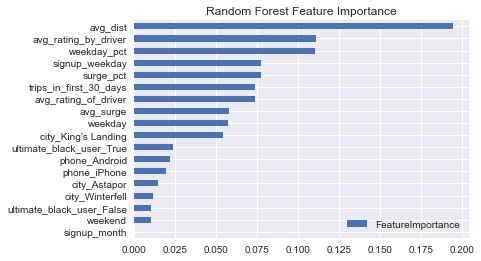

In [202]:
coefficientsRF = pd.DataFrame(rfc.feature_importances_,x.columns)
coefficientsRF.columns = ['FeatureImportance']
coefficientsRF=coefficientsRF.sort_values(by='FeatureImportance',ascending=True)
coefficientsRF.plot.barh()
plt.title('Random Forest Feature Importance')